## Os exercícios abaixo referem-se a base de dados “Risco de ataque cardíaco”

Obtenha o modelo utilizando os 5 primeiros exemplos da base de dados e também os 5 últimos. Calcule e apresente o erro quadrático médio aplicando o modelo de regressão nos 10 exemplos utilizados para obter o modelo de regressão. Depois calcule e apresente o erro quadrático médio do modelo de regressão obtido nos demais exemplos. Argumente se o modelo tem ou não uma boa capacidade de predição em novos exemplos. Compare com os resultados do exercício anterior e argumente as possíveis diferenças de resultados.

In [36]:
#Base de Dados:
database = {
"idade" : [10,12,14,16,18,20,22,24,26,28,
           30,32,34,36,38,40,44,50,60,70],
"prob_attack" : [0.05, 0.06, 0.07, 0.08, 0.10, 0.10, 0.11, 0.12, 0.12, 0.12,
                 0.18, 0.20, 0.21, 0.21, 0.23, 0.28, 0.40, 0.50, 0.60, 0.70]
}

In [37]:
# Imports

from __future__ import unicode_literals

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from math import sqrt
%matplotlib inline

## 5 primeiros e 5 últimos:

In [38]:
# Primeiros 5
x = database['idade'][:5]
y = database['prob_attack'][:5]

# Ultimos 5
x += database['idade'][-5:]
y += database['prob_attack'][-5:]

n = len(x)

xy = np.multiply(x, y)
xx = np.multiply(x, x)
yy = np.multiply(y, y)

In [39]:
b0 = float(( n*(sum(xy)) - sum(x)*sum(y))) / ( (n*sum(xx) - sum(x)**2) )
print b0

0.0111862557949


In [40]:
b1 = float(( sum(y)*sum(xx) - sum(x)*sum(xy) ))  /  ( n*(sum(xx)) - sum(x)**2 )
print b1

-0.0896209435506


In [41]:
y_hat = map(lambda xi : b0*xi+b1, x)

[]

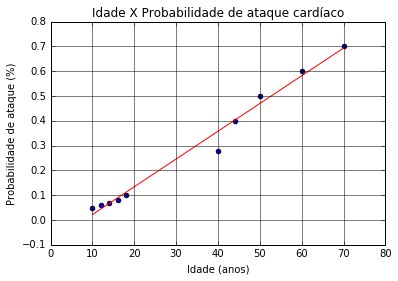

In [42]:
x = np.array(x)
y = np.array(y)
y_hat = np.array(y_hat)

fig, ax = plt.subplots()

reg_line = ax.plot(x, y_hat, color='red', label='modelo de regressão')

ax.grid(True, linestyle='-')

ax.scatter(x, y)

plt.xlabel('Idade (anos)')
plt.ylabel('Probabilidade de ataque (%)')
plt.title("Idade X Probabilidade de ataque cardíaco")
plt.plot()

In [43]:
y_median = float(sum(y))/n
r2 = sum(map( lambda yi_hat : (yi_hat-y_median)**2, y_hat)) / sum(map( lambda yi : (yi-y_median)**2, y))
print "Erro médio quadrático : %.2f%%"%(r2*100)

Erro médio quadrático : 98.46%


## Demais exemplos:

In [44]:
# Demais exemplos
x_remaining = database['idade'][5:15]
y_remaining = database['prob_attack'][5:15]


In [45]:
all_x = database['idade']
all_y = database['prob_attack']
all_y_hat = map(lambda xi : b0*xi+b1, all_x)

y_median = float(sum(all_y))/(n*2)
r2 = sum(map( lambda yi_hat : (yi_hat-y_median)**2, all_y_hat)) / sum(map( lambda yi : (yi-y_median)**2, all_y))
print "Erro médio quadrático : %.2f%%"%(r2*100)

Erro médio quadrático : 95.91%


[]

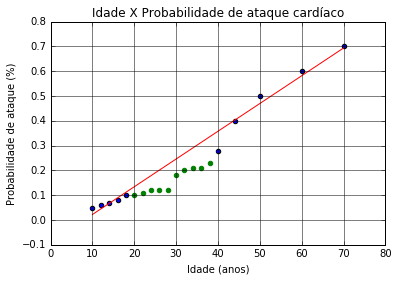

In [46]:
n = len(all_x)
all_x = np.array(all_x)
all_y = np.array(all_y)


fig, ax = plt.subplots()

reg_line = ax.plot(all_x, all_y_hat, color='red', label='modelo de regressão')

ax.grid(True, linestyle='-')

ax.scatter(x, y)
ax.scatter(x_remaining, y_remaining, color='green')

plt.xlabel('Idade (anos)')
plt.ylabel('Probabilidade de ataque (%)')
plt.title("Idade X Probabilidade de ataque cardíaco")
plt.plot()